In [1]:
import numpy as np
from matplotlib import pyplot as plt

from scipy import signal

# Frequency Resolution

Let's consider a 1 second time series sampled at 64 Hz containing two sinusiodal signals with frequencies near 10 Hz, with a 0.5 Hz difference in frequencies.  Calculate a DFT with 64 frequencies.

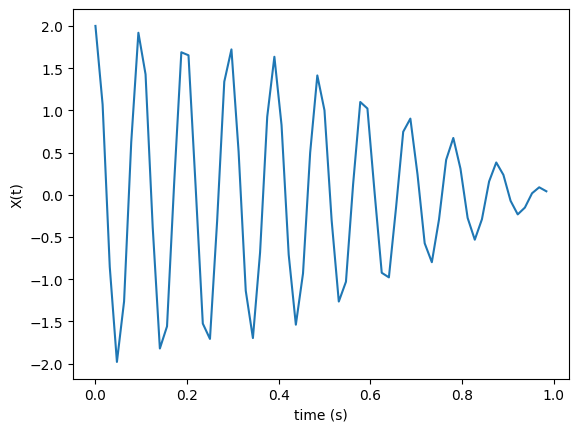

In [2]:
Nf = 64 # DFT size
fs = 64 # sampling frequency
f1 = 10  # frequency of first signal
deltaf = 1/2. # difference in frequency
f2 = f1 + deltaf # frequency of second signal
length = 1 # length of time series in seconds

t = np.arange(0, length, 1/fs) # time-domain samples
x = np.cos(2*np.pi*f1*t) + np.cos(2*np.pi*(f2)*t)
plt.plot(t, x)
plt.xlabel('time (s)')
plt.ylabel('X(t)');

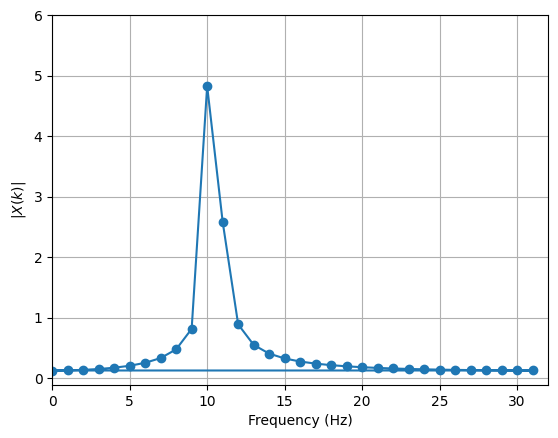

In [3]:
X = np.fft.fft(x, Nf)/np.sqrt(Nf)
freqs = np.fft.fftfreq(len(t), 1/fs)

plt.plot(freqs, abs(X), marker='o')

plt.ylabel(r'$|X(k)|$')
plt.xlabel('Frequency (Hz)')

plt.xlim(0, fs/2)
plt.ylim(top=6)
plt.grid();

It's looking like we can't tell from the DFT that there are two sinusoidal waveforms with different frequencies.  It also doesn't look like we've resolved the spectrum all that well.  

The frequency spacing of the DFT is just $f_s/N_f$, so let's just increase the number of output frequencies.

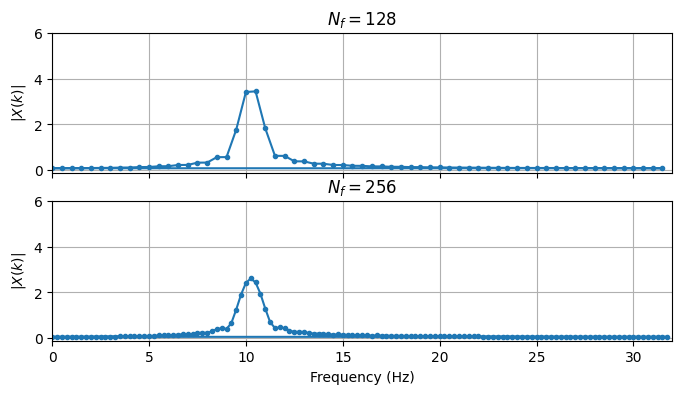

In [4]:
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(8, 4))

Nf = 2 * 64
X = np.fft.fft(x, Nf)/np.sqrt(Nf)
freqs = np.fft.fftfreq(Nf, 1/fs)

axs[0].plot(freqs, abs(X),'-o', ms=3.)
axs[0].set_title(r'$N_f={}$'.format(Nf))
axs[0].set_ylabel(r'$|X(k)|$')
axs[0].grid()

Nf = 64*4
X = np.fft.fft(x, Nf)/np.sqrt(Nf)
freqs = np.fft.fftfreq(Nf, 1/fs)

axs[1].plot(freqs, abs(X), '-o', ms=3.)
axs[1].set_title(r'$N_f={}$'.format(Nf))
axs[1].set_ylabel(r'$|X(k)|$')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_xlim(0, fs/2)
axs[1].set_ylim(ymax=6)
axs[1].grid();

This is the "uncertainty principal" that we've discussed previously.  Increasing the frequency resolution just fills in the frequencies on the unit circle more densly, and doesn't actually add any more information.  We're still limited by the fact that we have a signal with finite duration.

In other words, we can think of this as looking at the product of an infinite signal and a rectangular time window.  What happens if we double the duration of the rectangular time window?

In [5]:
t = np.arange(0, 2, 1/fs)
x = np.cos(2*np.pi*f1*t) + np.cos(2*np.pi*(f1+deltaf)*t)

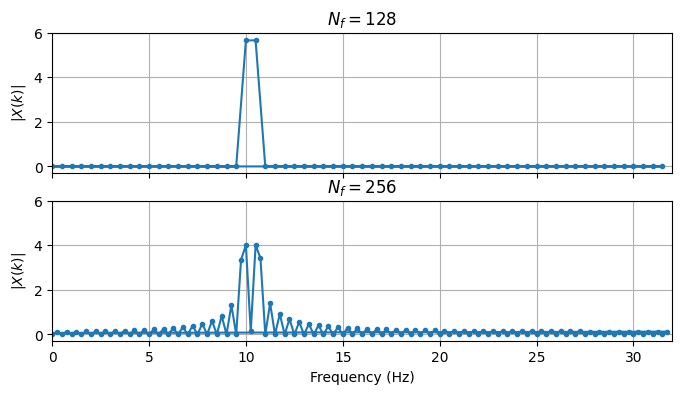

In [6]:
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(8, 4))

Nf = 2 * 64
X = np.fft.fft(x, Nf)/np.sqrt(Nf)
freqs = np.fft.fftfreq(Nf, 1/fs)

axs[0].plot(freqs, abs(X),'-o', ms=3.)
axs[0].set_title(r'$N_f={}$'.format(Nf))
axs[0].set_ylabel(r'$|X(k)|$')
axs[0].grid()

Nf = 64*4
X = np.fft.fft(x, Nf)/np.sqrt(Nf)
freqs = np.fft.fftfreq(Nf, 1/fs)

axs[1].plot(freqs, abs(X), '-o', ms=3.)
axs[1].set_title(r'$N_f={}$'.format(Nf))
axs[1].set_ylabel(r'$|X(k)|$')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_xlim(0, fs/2)
axs[1].set_ylim(ymax=6)
axs[1].grid()

# Windowing

Now let's consider a signal composed of two sinusoidal waves *with different amplitudes*.

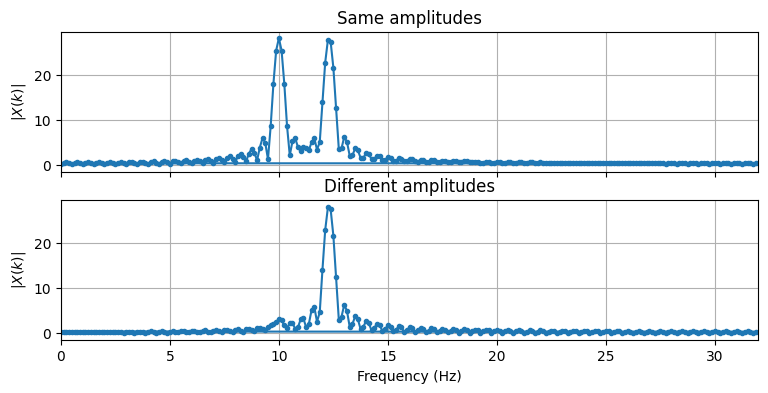

In [8]:
fs = 64
t = np.arange(0, 2, 1/fs)
f = 10
deltaf = 2.3
Nf = 512

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(9, 4))

# equal amplitudes
x = 10*np.cos(2*np.pi*f*t) + 10*np.cos(2*np.pi*(f+deltaf)*t)
X = np.fft.fft(x, Nf)/np.sqrt(Nf)
freqs = np.fft.fftfreq(Nf, 1/fs)
ax[0].plot(freqs, abs(X), marker='o', ms=3.)
ax[0].set_ylabel(r'$|X(k)|$')
ax[0].set_xlim(0, fs/2)
ax[0].set_title('Same amplitudes')
ax[0].grid()

# one has 10x the amplitude
x = np.cos(2*np.pi*f*t) + 10*np.cos(2*np.pi*(f+deltaf)*t)
X = np.fft.fft(x, Nf)/np.sqrt(Nf)
ax[1].plot(freqs, abs(X), marker='o', ms=3.)
ax[1].set_ylabel(r'$|X(k)|$')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_xlim(right=fs/2)
ax[1].set_title('Different amplitudes')
ax[1].grid();

Now we have the frequency resolution to separate the frequencies, but we've lost the weaker signal in the sidelobes of the louder one.  This is where *windowing* comes in.

A window is a function that is multiplied, sample-by-sample, against our signal.

$$
y_i = w_i s_i
$$

So was we've implicitly been using a *rectangular window*.  Let's compare it to a triangular window.

In [9]:
def dftmatrix(Nfft=32, N=None):
    k = np.arange(Nfft)
    if N is None:
        N = Nfft
    n = np.arange(N)
    U = np.matrix(np.exp(1j* 2*np.pi/Nfft*k*n[:,None]))
    return U/np.sqrt(Nfft)

/var/folders/b2/qcvsw_h948b_826rl483srp40000gn/T/ipykernel_91814/908287436.py:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem(np.arange(nsamp), rectwin, basefmt='b-', label='rectangular', use_line_collection=True)


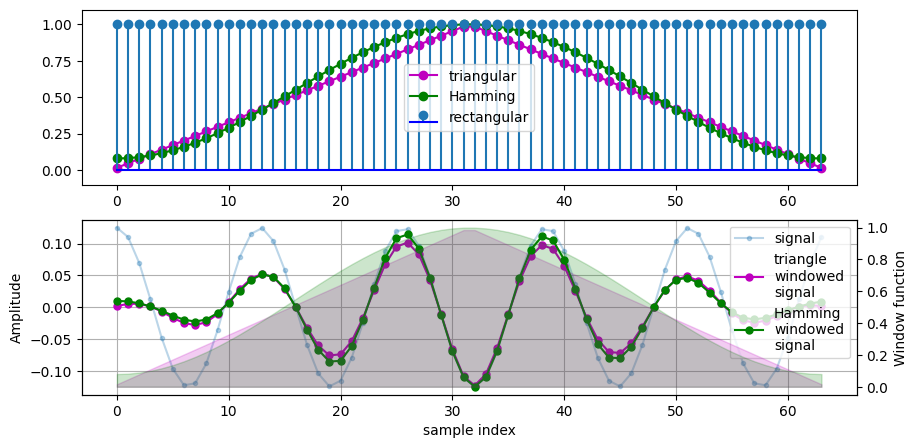

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(10, 5))

Nf = 128
nsamp = 64
triangle = signal.triang(nsamp)
rectwin = np.ones(nsamp)
hamming = signal.hamming(nsamp)

ax = axs[0]
ax.plot(np.arange(nsamp), triangle, marker='o', color='m', label='triangular')
ax.plot(np.arange(nsamp), hamming, marker='o', color='g', label='Hamming')
ax.stem(np.arange(nsamp), rectwin, basefmt='b-', label='rectangular', use_line_collection=True)
ax.set_ylim(-0.1, 1.1)
ax.legend()

x = np.array(dftmatrix(64, 64)[:,5].real).flatten()
n = np.arange(len(x))
window = signal.triang(len(x))

ax = axs[1]
ax.plot(n, x, marker='o', label='signal', ms=3., alpha=0.3)
ax.plot(n, triangle*x, marker='o', color='m', label='triangle\nwindowed\nsignal', ms=5.)
ax.plot(n, hamming*x, marker='o', color='g', label='Hamming\nwindowed\nsignal', ms=5.)
ax.set_ylabel('Amplitude')
ax.set_xlabel('sample index')
ax.legend(loc='upper right')
ax.grid()

ax2 = ax.twinx()
ax2.fill_between(n,triangle,alpha=0.2,color='m')
ax2.fill_between(n,hamming,alpha=0.2,color='g')
ax2.set_ylabel('Window function');

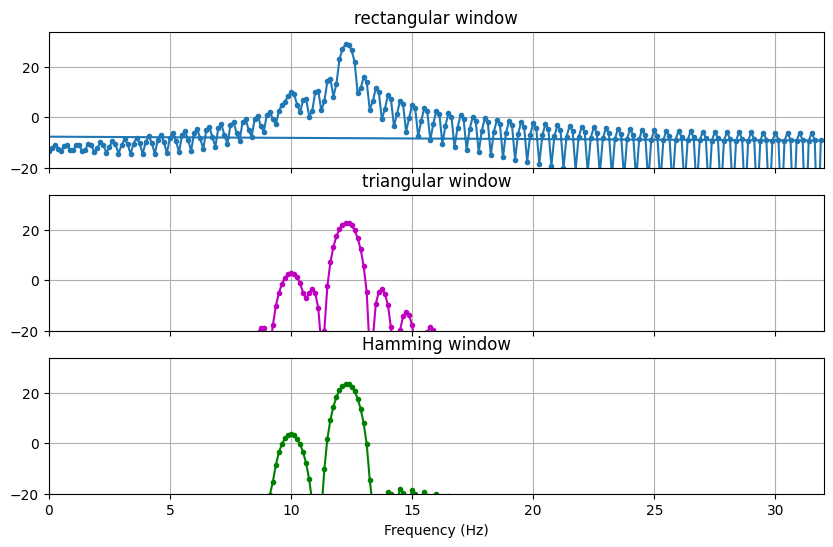

In [11]:
def db20(W, Nfft=None):
    'Given DFT, return power level in dB'
    if Nfft is None: # assume W is DFT
        return 20*np.log10(abs(W))
    else: # assume time-domain passed, so need DFT
        return 20*np.log10(abs(np.fft.fft(W, Nfft)/np.sqrt(Nfft)))

Nf = 512

fig, axs = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(10, 6))

x = np.cos(2*np.pi*f*t) + 10*np.cos(2*np.pi*(f+deltaf)*t)

X = np.fft.fft(x, Nf)/np.sqrt(Nf)
freqs = np.fft.fftfreq(Nf, 1/fs)

axs[0].plot(freqs, db20(X), marker='o', ms=3.)
axs[0].grid()
axs[0].set_title('rectangular window')

w = signal.triang(len(x))
X = np.fft.fft(x*w, Nf)/np.sqrt(Nf)
axs[1].plot(freqs, db20(X), marker='o', ms=3., color='m')
axs[1].grid()
axs[1].set_title('triangular window')

w = signal.hamming(len(x))
X = np.fft.fft(x*w, Nf)/np.sqrt(Nf)
axs[2].plot(freqs, db20(X), marker='o', ms=3., color='g')
axs[2].set_xlabel('Frequency (Hz)')
axs[2].set_xlim(0, fs/2)
axs[2].grid()
axs[2].set_ylim(bottom=-20)
axs[2].set_title('Hamming window');

So more agressive windowing reduces the sidelobes, allowing us to see weaker signals.  At the same time we're taking away signal energy, making the width of the dominant signal broaden.  Basically, we're trading signal energy for resolution in this case.

# Filtering

Filtering allows us to remove some freqencies from our signal while keeping others.  There are many kinds of filters, but we'll focus on finite impulse response (FIR) filters, as they're one of the most often used.

FIR filters take the form

$$
y_i = \sum_{k=0}^{M-1}h_kx_{i-k}
$$

with real input $x_i$ and real output $y_i$.  The name, finite impulse response, comes from the fact that these filters stop outputing things when the input stop; in other words, there's no feedback loop.  They're also called *moving average* or *all-zero* filters.  $M$ is the *taps*, where a 10-tap filter has $M=10$.  For example, a two-tap filter $h_0 = h_1 = 1/2$ results in

$$
y_i = x_i/2 + x_{i-1}/2
$$

Note that one sample is lost in filling the filter, so we don't get a valid filter output until we have two samples.  Let's take a look at this using `scipy`.

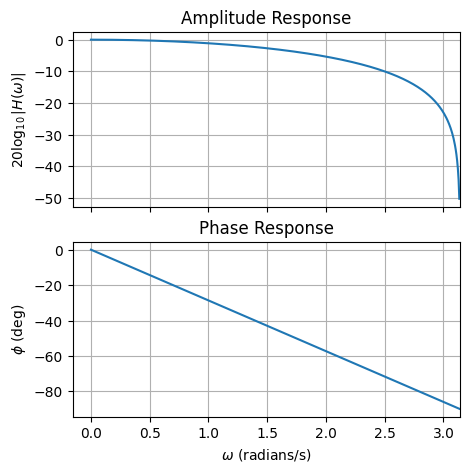

In [12]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(5, 5))
plt.subplots_adjust(hspace=.2)

# Compute impulse response
w, h = signal.freqz([1/2., 1/2.], 1)

ax = axs[0]
ax.plot(w, 20*np.log10(abs(h)))
ax.set_ylabel(r"$20 \log_{10} |H(\omega)|$")
ax.set_title("Amplitude Response")
ax.grid()

ax=axs[1]
ax.plot(w, np.angle(h)/np.pi*180)
ax.set_xlabel(r'$\omega$ (radians/s)')
ax.set_ylabel(r"$\phi $ (deg)")
ax.set_title("Phase Response")
ax.set_xlim(xmax=np.pi)
ax.grid();

The top shows the amplitude response of the filter, showing that the signal amplitude is preserved for the $\omega=0$ component of the signal, and increasingly reduced for higher frequency.

## Constructing FIR filters

Now let's consider the ideal lowpass filter, which removes all components of a signal with frequency higher than $\omega_c$

$$
|H_d(\omega)| = 1 ~~~\forall~~~ \omega \in (-\omega_c, \omega_c)
$$

and zero, otherwise.  The inverse Fourier transform of this is

$$
h_i = \frac{\omega_c}{\pi}\frac{\sin(\omega_c i)}{\omega_c i}
$$

if $i\ne0$ and

$$
h_{i=0} = \frac{\omega_c}{\pi}
$$

The above is non-causal (meaning filter output depends on *future* inputs) and infinitely long.  We can shift the sequence and truncate to solve these problems, respectively.

/var/folders/b2/qcvsw_h948b_826rl483srp40000gn/T/ipykernel_91814/551436694.py:17: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem(i+M, h, basefmt='b-', use_line_collection=True)


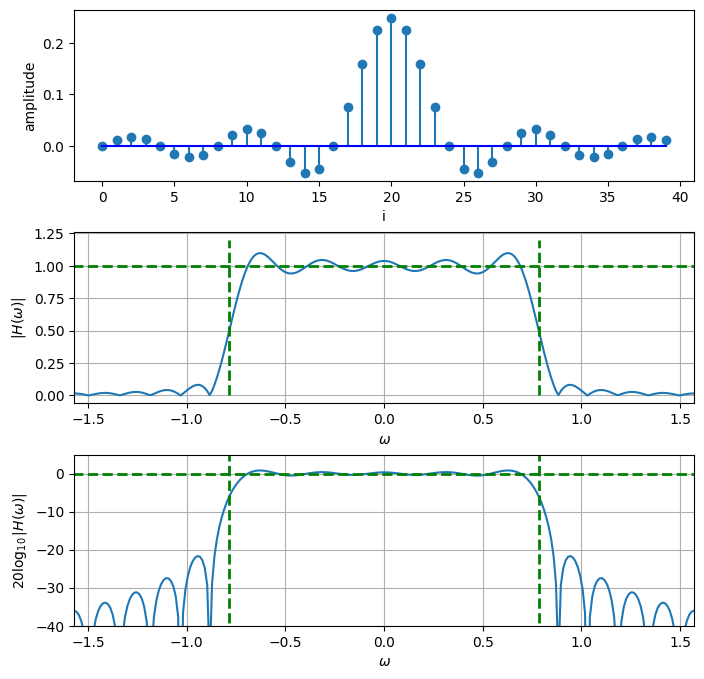

In [13]:
wc = np.pi/4
M = 20
N = 512
i = np.arange(-M, M)
h = wc/np.pi * np.sinc(wc*i/np.pi)

# get entire frequency domain
w, Hh = signal.freqz(h, 1, whole=True, worN=N)

# shift to center for plotting
wx = np.fft.fftfreq(len(w)) 

fig, axs = plt.subplots(3, 1, figsize=(8, 8))
plt.subplots_adjust(hspace=0.3)

ax = axs[0]
ax.stem(i+M, h, basefmt='b-', use_line_collection=True)
ax.set_xlabel("i")
ax.set_ylabel("amplitude")

ax = axs[1]
ax.plot(w-np.pi, abs(np.fft.fftshift(Hh)))
ax.set_xlim(-np.pi/2, np.pi/2)
ax.vlines([-wc, wc], 0, 1.2, color='g', lw=2., linestyle='--')
ax.hlines(1, -np.pi, np.pi, color='g', lw=2., linestyle='--')
ax.set_xlabel(r"$\omega$")
ax.set_ylabel(r"$|H(\omega)| $")
ax.grid()

ax=axs[2]
ax.plot(w-np.pi, 20*np.log10(abs(np.fft.fftshift(Hh))))
ax.set_xlim(-np.pi/2, np.pi/2)
ax.set_ylim(ymin=-40)
ax.vlines([-wc, wc], 10, -40, color='g', lw=2., linestyle='--')
ax.hlines(0, -np.pi, np.pi, color='g', lw=2., linestyle='--')
ax.grid()
ax.set_xlabel(r"$\omega$")
ax.set_ylabel(r"$20\log_{10}|H(\omega)| $");